<a href="https://colab.research.google.com/github/EstherAbayomi07/S_tar/blob/main1/SECTION_15_Python_Datal_Analysis_Bootcamp_with_Pandas_and_NLTK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#SECTION 15

from google.colab import files

file = files.upload() 


Saving author_and_quote.csv to author_and_quote.csv


In [2]:
import pandas as pd

import io

dataframe = pd.read_csv(io.StringIO(file["author_and_quote.csv"].decode("utf-8")),
                            sep=",")

print(dataframe.head().to_string())

              Author                                                                        Quote
0      Tommy Rollins                 There can never be too many cherries on an ice cream sundae.
1   Everette Goodman                                    There's a message for you if you look up.
2    Stanford Juarez                                  He liked to play with words in the bathtub.
3  Alexandra Aguirre  As the years pass by we all know owners look more and more like their dogs.
4      Joyce Vasquez                                          She folded her handkerchief neatly.


In [3]:
quotes_list = dataframe["Quote"].tolist()

print(quotes_list)

['There can never be too many cherries on an ice cream sundae.', "There's a message for you if you look up.", 'He liked to play with words in the bathtub.', 'As the years pass by we all know owners look more and more like their dogs.', 'She folded her handkerchief neatly.', "Dolores wouldn't have eaten the meal if she had known what it actually was.", 'Plans for this weekend include turning wine into water.', 'Courage and stupidity were all he had.', 'My dentist tells me that chewing bricks is very bad for your teeth.', 'Martha came to the conclusion that weights are a great gift for any occasion.', 'She was too busy always talking about what she wanted to do to actually do any of it.', 'He is good at eating pickles and telling women about his emotional problems.', 'He told us a very exciting adventure story.', "You realize you're not alone as you sit in your bedroom massaging your calves after a long day of playing tug-of-war with Grandpa Joe in the hospital.", 'The toy brought back f

In [4]:
#how to tokenize our dataset
import nltk
import unicodedata
import string
import re


def remove_accents(token):
  return "".join(x for x in unicodedata.normalize("NFKD", token) if x in string.ascii_letters or x == " ") 

nltk.download("stopwords")

nltk.download("punkt")

nltk.download('averaged_perceptron_tagger')


nltk.download("wordnet")

stopwords  = nltk.corpus.stopwords.words("english")

stemmer    = nltk.stem.PorterStemmer()

lemmatizer = nltk.stem.WordNetLemmatizer()

RE_VALID = "[a-zA-Z]"
MINIMUM_STRING_LENGTH = 3

ALLOWED_PART_OF_SPEECH_TYPES = { "NN": "n",
                                 "JJ":"a",
                                 "VB":"v",
                                 "RB":"r"}
PART_OF_SPEECH_TYPES_KEYS = list(ALLOWED_PART_OF_SPEECH_TYPES.keys())

tokens_list           = []

all_tokens_lists      = []

all_lemmatized_tokens = []

for index, text in enumerate(quotes_list):
  tokens = [word.lower() for sentence in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sentence)]

  list_sentence_tokens  = []

  non_lemmatized_tokens = []

  for token in tokens:

    result = remove_accents(token)

    result = str(result).translate(string.punctuation)

    list_sentence_tokens.append(result)

    non_lemmatized_tokens.append("-")

    if result not in stopwords:
      
      if re.search(RE_VALID, result):

        if len(result) >= MINIMUM_STRING_LENGTH:

          part_of_speech = nltk.pos_tag([result]) [0][1][:2]

          default_part_of_speech = "n"

          if part_of_speech in ALLOWED_PART_OF_SPEECH_TYPES:

            default_part_of_speech = ALLOWED_PART_OF_SPEECH_TYPES[part_of_speech]

          stem = stemmer.stem(result)

          lemmatization = lemmatizer.lemmatize(result,
                                               pos=default_part_of_speech)
          
          if part_of_speech in PART_OF_SPEECH_TYPES_KEYS:

            tokens_list.append((result,
                                stem,
                                lemmatization,
                                part_of_speech))
            non_lemmatized_tokens = non_lemmatized_tokens[:-1]

            non_lemmatized_tokens.append(lemmatization)

  all_tokens_lists.append(list_sentence_tokens)

  lemmatized_tokens_list = "".join(non_lemmatized_tokens)

  all_lemmatized_tokens.append(lemmatized_tokens_list)

dataframe_tokens = pd.DataFrame(all_tokens_lists)     

print(dataframe_tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


           0         1           2              3           4          5   \
0       there       can       never             be         too       many   
1       there         s           a        message         for        you   
2          he     liked          to           play        with      words   
3          as       the       years           pass          by         we   
4         she    folded         her   handkerchief      neatly              
5     dolores     would          nt           have       eaten        the   
6       plans       for        this        weekend     include    turning   
7     courage       and   stupidity           were         all         he   
8          my   dentist       tells             me        that    chewing   
9      martha      came          to            the  conclusion       that   
10        she       was         too           busy      always    talking   
11         he        is        good             at      eating    pickles   

In [5]:
print(dataframe_tokens.head().to_string())

      0       1      2             3       4      5         6     7        8     9      10      11    12    13     14    15    16    17    18    19    20    21    22    23    24    25    26    27    28
0  there     can  never            be     too   many  cherries    on       an   ice  cream  sundae        None   None  None  None  None  None  None  None  None  None  None  None  None  None  None  None
1  there       s      a       message     for    you        if   you     look    up           None  None  None   None  None  None  None  None  None  None  None  None  None  None  None  None  None  None
2     he   liked     to          play    with  words        in   the  bathtub         None    None  None  None   None  None  None  None  None  None  None  None  None  None  None  None  None  None  None
3     as     the  years          pass      by     we       all  know   owners  look   more     and  more  like  their  dogs        None  None  None  None  None  None  None  None  None  None  N

In [6]:
for entry in dataframe_tokens:

  if str(dataframe_tokens[entry].dtype) in ("object", "string_", "unicode_"):
     
     dataframe_tokens[entry].fillna(value=" ", inplace=True)

In [7]:
print(dataframe_tokens.head().to_string())

      0       1      2             3       4      5         6     7        8     9      10      11    12    13     14    15 16 17 18 19 20 21 22 23 24 25 26 27 28
0  there     can  never            be     too   many  cherries    on       an   ice  cream  sundae                                                                
1  there       s      a       message     for    you        if   you     look    up                                                                               
2     he   liked     to          play    with  words        in   the  bathtub                                                                                     
3     as     the  years          pass      by     we       all  know   owners  look   more     and  more  like  their  dogs                                       
4    she  folded    her  handkerchief  neatly                                                                                                                     


In [8]:
dataframe_all_words = pd.DataFrame(tokens_list, columns=["token",
                                                          "stem",
                                                          "lemmatization",
                                                          "part_of_speech"])

print(dataframe_all_words.head().to_string())

      token    stem lemmatization part_of_speech
0     never   never         never             RB
1      many    mani          many             JJ
2  cherries  cherri        cherry             NN
3       ice     ice           ice             NN
4     cream   cream         cream             NN


In [9]:
print(dataframe_all_words.to_string())

             token          stem lemmatization part_of_speech
0            never         never         never             RB
1             many          mani          many             JJ
2         cherries        cherri        cherry             NN
3              ice           ice           ice             NN
4            cream         cream         cream             NN
5           sundae         sunda        sundae             NN
6          message        messag       message             NN
7             look          look          look             NN
8            liked          like          like             VB
9             play          play          play             NN
10           words          word          word             NN
11         bathtub       bathtub       bathtub             NN
12           years          year          year             NN
13            pass          pass           pas             NN
14            know          know          know             VB
15      

In [10]:
dataframe_all_words["counts"] = dataframe_all_words.groupby(["lemmatization"])["lemmatization"].transform("count")

print(dataframe_all_words["counts"])

print(dataframe_all_words)

0      1
1      2
2      1
3      1
4      1
      ..
286    1
287    2
288    1
289    1
290    2
Name: counts, Length: 291, dtype: int64
        token    stem lemmatization part_of_speech  counts
0       never   never         never             RB       1
1        many    mani          many             JJ       2
2    cherries  cherri        cherry             NN       1
3         ice     ice           ice             NN       1
4       cream   cream         cream             NN       1
..        ...     ...           ...            ...     ...
286      girl    girl          girl             NN       1
287    wanted    want          want             VB       2
288      live    live          live             JJ       1
289      pink    pink          pink             NN       1
290     house    hous         house             NN       2

[291 rows x 5 columns]


In [12]:
dataframe_all_words = dataframe_all_words.sort_values(by=["counts",
                                    "lemmatization"],
                                ascending=[False, True]).reset_index()
print(dataframe_all_words)

print(dataframe_all_words.to_string())

     level_0  index      token       stem lemmatization part_of_speech  counts
0          0      9       play       play          play             NN       5
1          1     71    playing       play          play             VB       5
2          2     94    playing       play          play             VB       5
3          3    205    playing       play          play             VB       5
4          4    251    playing       play          play             VB       5
..       ...    ...        ...        ...           ...            ...     ...
286      286    117   wondered     wonder        wonder             VB       1
287      287    197  wonderful     wonder     wonderful             NN       1
288      288     10      words       word          word             NN       1
289      289     12      years       year          year             NN       1
290      290    176  yesterday  yesterday     yesterday             NN       1

[291 rows x 7 columns]
     level_0  index         

In [14]:
dataframe_grouped = dataframe_all_words.groupby("lemmatization").first().sort_values(by="counts",
                                                                  ascending=False).reset_index()

print(dataframe_grouped.to_string())

    lemmatization  level_0  index          token          stem part_of_speech  counts
0            play        0      9           play          play             NN       5
1            look        9      7           look          look             NN       4
2             day        5     70            day           day             NN       4
3             old       13    118            old           old             JJ       4
4            know       23     14           know          know             VB       3
5            back       17     78           back          back             RB       3
6            life       26    125           life          life             NN       3
7          enough       20    119         enough        enough             RB       3
8            good       49     52           good          good             JJ       2
9            make       57    159           make          make             VB       2
10          house       53    127          house      

In [16]:
dataframe_grouped = dataframe_grouped[["lemmatization", "part_of_speech", "counts"]]

for part_of_speech_type in PART_OF_SPEECH_TYPES_KEYS:
  dataframe_part_of_speech = dataframe_grouped[dataframe_grouped["part_of_speech"] == part_of_speech_type]

  print(dataframe_part_of_speech.to_string())

    lemmatization part_of_speech  counts
0            play             NN       5
1            look             NN       4
2             day             NN       4
6            life             NN       3
10          house             NN       2
12          light             NN       2
15       everyone             NN       2
16           hear             NN       2
17           need             NN       2
19         memory             NN       2
20        realise             NN       2
22          share             NN       2
23            sit             NN       2
24         street             NN       2
25         sunset             NN       2
26          table             NN       2
27           tell             NN       2
28          today             NN       2
34        brought             NN       2
35         become             NN       2
36            ran             NN       1
37           plan             NN       1
38          plane             NN       1
39       backwar

In [17]:
flattened_tokens_lists = [y for x in all_tokens_lists for y in x ]

print(flattened_tokens_lists)


['there', 'can', 'never', 'be', 'too', 'many', 'cherries', 'on', 'an', 'ice', 'cream', 'sundae', '', 'there', 's', 'a', 'message', 'for', 'you', 'if', 'you', 'look', 'up', '', 'he', 'liked', 'to', 'play', 'with', 'words', 'in', 'the', 'bathtub', '', 'as', 'the', 'years', 'pass', 'by', 'we', 'all', 'know', 'owners', 'look', 'more', 'and', 'more', 'like', 'their', 'dogs', '', 'she', 'folded', 'her', 'handkerchief', 'neatly', '', 'dolores', 'would', 'nt', 'have', 'eaten', 'the', 'meal', 'if', 'she', 'had', 'known', 'what', 'it', 'actually', 'was', '', 'plans', 'for', 'this', 'weekend', 'include', 'turning', 'wine', 'into', 'water', '', 'courage', 'and', 'stupidity', 'were', 'all', 'he', 'had', '', 'my', 'dentist', 'tells', 'me', 'that', 'chewing', 'bricks', 'is', 'very', 'bad', 'for', 'your', 'teeth', '', 'martha', 'came', 'to', 'the', 'conclusion', 'that', 'weights', 'are', 'a', 'great', 'gift', 'for', 'any', 'occasion', '', 'she', 'was', 'too', 'busy', 'always', 'talking', 'about', 'wha

In [18]:
token_frequency = nltk.FreqDist(flattened_tokens_lists)

print(token_frequency)

<FreqDist with 349 samples and 703 outcomes>


In [19]:
del  token_frequency[""]

print(token_frequency)

<FreqDist with 348 samples and 646 outcomes>


In [20]:
sorted_token_frequency = sorted(token_frequency.items(),
                                key=lambda x: x[1],
                                reverse=True)

print(sorted_token_frequency)

[('the', 42), ('to', 21), ('he', 15), ('in', 13), ('a', 12), ('of', 12), ('was', 10), ('it', 9), ('with', 8), ('she', 8), ('for', 7), ('you', 7), ('and', 7), ('there', 6), ('all', 6), ('that', 6), ('but', 6), ('her', 5), ('nt', 5), ('i', 5), ('s', 4), ('if', 4), ('we', 4), ('have', 4), ('were', 4), ('my', 4), ('playing', 4), ('be', 3), ('too', 3), ('on', 3), ('an', 3), ('look', 3), ('as', 3), ('would', 3), ('had', 3), ('what', 3), ('is', 3), ('your', 3), ('are', 3), ('do', 3), ('at', 3), ('his', 3), ('not', 3), ('back', 3), ('they', 3), ('enough', 3), ('life', 3), ('from', 3), ('t', 3), ('did', 3), ('one', 3), ('can', 2), ('many', 2), ('more', 2), ('like', 2), ('their', 2), ('actually', 2), ('this', 2), ('into', 2), ('very', 2), ('bad', 2), ('any', 2), ('about', 2), ('wanted', 2), ('good', 2), ('re', 2), ('after', 2), ('day', 2), ('brought', 2), ('memories', 2), ('see', 2), ('arrived', 2), ('realise', 2), ('light', 2), ('when', 2), ('street', 2), ('old', 2), ('go', 2), ('house', 2), ('

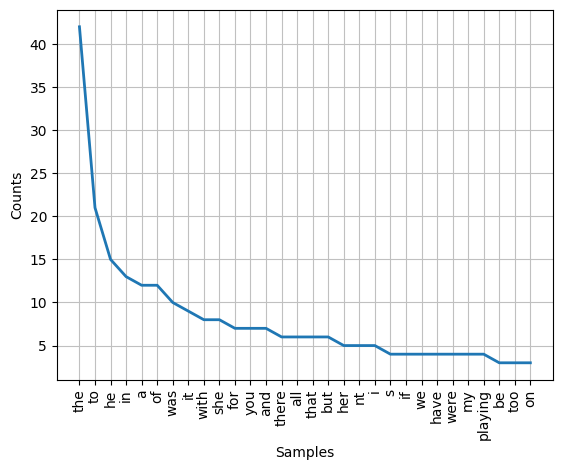

<Axes: xlabel='Samples', ylabel='Counts'>

In [21]:
token_frequency.plot(30, cumulative=False)

In [23]:
lemmatized_words = dataframe_all_words["lemmatization"].tolist()

lemmatized_frequency = nltk.FreqDist(lemmatized_words)

sorted(lemmatized_frequency.items(),
       key=lambda x: [1],
       reverse=True)

print(lemmatized_frequency)

<FreqDist with 242 samples and 291 outcomes>


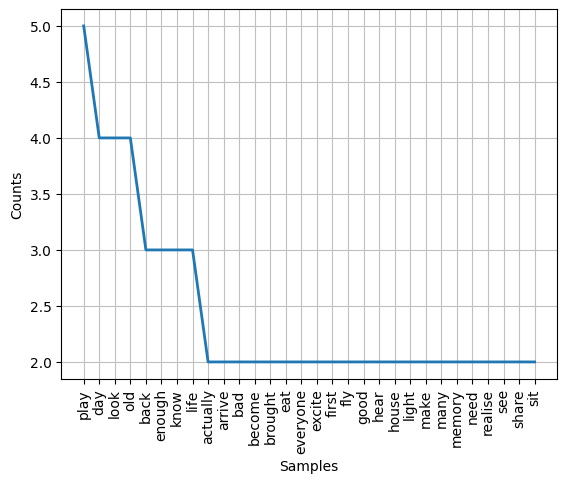

<Axes: xlabel='Samples', ylabel='Counts'>

In [24]:
lemmatized_frequency.plot(30, cumulative=False)